In [1]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from imblearn.ensemble  import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [2]:
# Importing the data
data = 'data/county_pop_df.csv'
county_df = pd.read_csv(data)
county_df

,CountyName,CountyFIPS,TotalPopulation,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,BPHIGH_CrudePrev,BPHIGH_AdjPrev,BPMED_CrudePrev,...,PHLTH_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev,TEETHLOST_CrudePrev,TEETHLOST_AdjPrev,Geolocation,County_State,RuralUrban
0,Jackson,40065,24530,23.5,23.0,13.6,13.6,34.5,34.1,73.8,...,13.8,37.1,37.7,3.4,3.3,18.6,18.8,POINT (-99.41467445 34.58811786),"Jackson, Oklahoma",Rural
1,Lawrence,17101,15678,27.9,25.6,20.4,21.5,35.4,33.3,73.6,...,13.9,36.1,36.8,3.8,3.4,17.1,17.2,POINT (-87.72684251 38.7203392),"Lawrence, Illinois",Rural
2,Barton,20009,25779,27.7,23.7,15.4,17.1,37.2,32.9,77.1,...,12.5,32.9,34.2,3.8,3.1,17.1,17.2,POINT (-98.75632156 38.478934),"Barton, Kansas",Rural
3,Anchorage,2020,288000,19.3,20.0,18.8,18.2,28.8,29.8,64.0,...,10.1,34.6,34.4,2.6,2.7,11.7,12.2,POINT (-149.1141071 61.1504589),"Anchorage, Alaska",Urban
4,Stephens,40137,43143,30.4,25.7,12.0,13.5,41.3,36.0,77.6,...,14.6,36.0,37.3,4.3,3.5,20.4,20.6,POINT (-97.85149263 34.485439),"Stephens, Oklahoma",Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,Carter,21043,26797,39.4,34.1,13.0,14.6,46.3,41.0,81.2,...,18.4,43.5,44.7,5.1,4.2,27.2,27.7,POINT (-83.04983435 38.31844184),"Carter, Kentucky",Rural
3117,DeSoto,28033,184945,25.7,24.6,15.3,15.6,37.6,36.4,77.4,...,11.3,36.8,36.9,3.3,3.1,13.8,14.2,POINT (-89.99137922 34.87557805),"DeSoto, Mississippi",Urban
3118,Richmond,36085,476143,21.5,19.4,15.8,16.7,29.4,27.0,76.7,...,11.5,43.0,43.6,3.0,2.7,15.0,15.3,POINT (-74.15238026 40.58072907),"Richmond, New York",Urban
3119,Saline,20169,54224,25.9,22.9,16.6,17.9,32.8,29.6,76.3,...,11.2,31.5,32.5,3.3,2.8,14.0,14.1,POINT (-97.64993321 38.78398051),"Saline, Kansas",Urban


In [3]:
# Dropping null values
county_df = county_df.dropna()
county_df

,CountyName,CountyFIPS,TotalPopulation,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,BPHIGH_CrudePrev,BPHIGH_AdjPrev,BPMED_CrudePrev,...,PHLTH_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev,TEETHLOST_CrudePrev,TEETHLOST_AdjPrev,Geolocation,County_State,RuralUrban
0,Jackson,40065,24530,23.5,23.0,13.6,13.6,34.5,34.1,73.8,...,13.8,37.1,37.7,3.4,3.3,18.6,18.8,POINT (-99.41467445 34.58811786),"Jackson, Oklahoma",Rural
1,Lawrence,17101,15678,27.9,25.6,20.4,21.5,35.4,33.3,73.6,...,13.9,36.1,36.8,3.8,3.4,17.1,17.2,POINT (-87.72684251 38.7203392),"Lawrence, Illinois",Rural
2,Barton,20009,25779,27.7,23.7,15.4,17.1,37.2,32.9,77.1,...,12.5,32.9,34.2,3.8,3.1,17.1,17.2,POINT (-98.75632156 38.478934),"Barton, Kansas",Rural
3,Anchorage,2020,288000,19.3,20.0,18.8,18.2,28.8,29.8,64.0,...,10.1,34.6,34.4,2.6,2.7,11.7,12.2,POINT (-149.1141071 61.1504589),"Anchorage, Alaska",Urban
4,Stephens,40137,43143,30.4,25.7,12.0,13.5,41.3,36.0,77.6,...,14.6,36.0,37.3,4.3,3.5,20.4,20.6,POINT (-97.85149263 34.485439),"Stephens, Oklahoma",Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,Carter,21043,26797,39.4,34.1,13.0,14.6,46.3,41.0,81.2,...,18.4,43.5,44.7,5.1,4.2,27.2,27.7,POINT (-83.04983435 38.31844184),"Carter, Kentucky",Rural
3117,DeSoto,28033,184945,25.7,24.6,15.3,15.6,37.6,36.4,77.4,...,11.3,36.8,36.9,3.3,3.1,13.8,14.2,POINT (-89.99137922 34.87557805),"DeSoto, Mississippi",Urban
3118,Richmond,36085,476143,21.5,19.4,15.8,16.7,29.4,27.0,76.7,...,11.5,43.0,43.6,3.0,2.7,15.0,15.3,POINT (-74.15238026 40.58072907),"Richmond, New York",Urban
3119,Saline,20169,54224,25.9,22.9,16.6,17.9,32.8,29.6,76.3,...,11.2,31.5,32.5,3.3,2.8,14.0,14.1,POINT (-97.64993321 38.78398051),"Saline, Kansas",Urban


In [4]:
# Dropping "AdjPrev" columns
for column in county_df:
    if "AdjPrev" in column:
        county_df = county_df.drop(column, axis=1)

In [5]:
# Dropping more columns
county_df = county_df.drop(columns=["Geolocation","CountyFIPS", "CountyName", "County_State"])

In [6]:
# Displaying DF
county_df

,TotalPopulation,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,...,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,RuralUrban
0,24530,23.5,13.6,34.5,73.8,6.3,9.7,82.2,6.7,74.4,...,3.2,38.3,71.8,15.0,35.6,13.8,37.1,3.4,18.6,Rural
1,15678,27.9,20.4,35.4,73.6,7.4,9.5,81.6,7.3,74.6,...,3.2,30.8,69.0,15.4,38.4,14.5,36.1,3.8,17.1,Rural
2,25779,27.7,15.4,37.2,77.1,7.9,9.6,81.6,7.4,75.1,...,3.4,32.7,69.7,14.6,36.5,13.4,32.9,3.8,17.1,Rural
3,288000,19.3,18.8,28.8,64.0,5.6,9.3,83.5,4.5,68.1,...,2.4,20.2,68.4,12.7,30.6,10.0,34.6,2.6,11.7,Urban
4,43143,30.4,12.0,41.3,77.6,8.2,10.3,81.5,8.8,77.2,...,3.6,40.1,69.9,15.7,36.4,15.9,36.0,4.3,20.4,Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,26797,39.4,13.0,46.3,81.2,8.7,10.9,81.7,10.5,81.8,...,4.0,41.9,70.7,19.0,42.2,19.9,43.5,5.1,27.2,Rural
3117,184945,25.7,15.3,37.6,77.4,6.6,9.4,87.0,5.5,79.4,...,2.7,32.4,67.6,15.2,38.2,11.7,36.8,3.3,13.8,Urban
3118,476143,21.5,15.8,29.4,76.7,6.8,9.6,85.0,5.8,81.2,...,2.8,30.9,76.9,13.1,30.0,12.1,43.0,3.0,15.0,Urban
3119,54224,25.9,16.6,32.8,76.3,7.4,9.4,83.2,6.3,76.1,...,3.0,30.2,73.6,13.6,35.3,11.9,31.5,3.3,14.0,Urban


In [7]:
# Defining X and y
X = county_df.drop(columns=["TotalPopulation", "RuralUrban"])
y = county_df["RuralUrban"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Balanced Random Forest Classifier

In [9]:
# Fitting and testing a BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=1, n_estimators=100).fit(X_train, y_train)
print(f'Training Score: {brf.score(X_train, y_train)}')
print(f'Testing Score: {brf.score(X_test, y_test)}')

Training Score: 0.9491452991452991
Testing Score: 0.8412291933418694


In [10]:
# Assinging feature importances to a variable
feature_importances = brf.feature_importances_

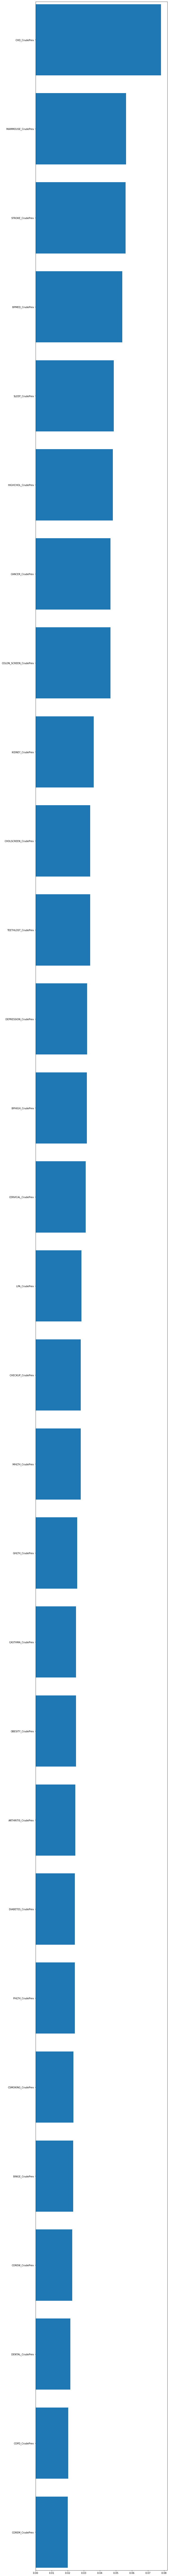

In [11]:
# Displaying feature importances in a bar chart
features = sorted(zip(X.columns, brf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [12]:
# Display a zip of feature_importances
sorted(zip(feature_importances, X.columns), reverse=True)

[(0.0781308736580518, 'CHD_CrudePrev'),
 (0.05639297640586312, 'MAMMOUSE_CrudePrev'),
 (0.05607897070386453, 'STROKE_CrudePrev'),
 (0.054049793621177226, 'BPMED_CrudePrev'),
 (0.04866580854448266, 'SLEEP_CrudePrev'),
 (0.04816485510928408, 'HIGHCHOL_CrudePrev'),
 (0.046593008047934655, 'CANCER_CrudePrev'),
 (0.04655784725437741, 'COLON_SCREEN_CrudePrev'),
 (0.03614574730134264, 'KIDNEY_CrudePrev'),
 (0.034015245707164944, 'CHOLSCREEN_CrudePrev'),
 (0.03397887099284684, 'TEETHLOST_CrudePrev'),
 (0.03207267072688004, 'DEPRESSION_CrudePrev'),
 (0.03191181874626953, 'BPHIGH_CrudePrev'),
 (0.031212293117882053, 'CERVICAL_CrudePrev'),
 (0.02854837685778516, 'LPA_CrudePrev'),
 (0.02812432581229596, 'CHECKUP_CrudePrev'),
 (0.028108771302665522, 'MHLTH_CrudePrev'),
 (0.025952046240703384, 'GHLTH_CrudePrev'),
 (0.02517392891251746, 'CASTHMA_CrudePrev'),
 (0.025146430847970493, 'OBESITY_CrudePrev'),
 (0.02466394700951209, 'ARTHRITIS_CrudePrev'),
 (0.024396972884530355, 'DIABETES_CrudePrev'),
 (0.

In [13]:
# Calculated the balanced accuracy score
y_pred = brf.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.8456842185244282

In [14]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[446,  89],
       [ 35, 211]], dtype=int64)

In [15]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

      Rural       0.93      0.83      0.86      0.88      0.85      0.71       535
      Urban       0.70      0.86      0.83      0.77      0.85      0.72       246

avg / total       0.86      0.84      0.85      0.84      0.85      0.71       781



## Easy Ensemble Classifier

In [16]:
# Creating and fitting an EasyEnsebleClassifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [17]:
# Calculated the balanced accuracy score
y_pred = eec.predict(X_test)
acc_score = balanced_accuracy_score(y_test, y_pred)
acc_score

0.8262214117468278

In [18]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

array([[423, 112],
       [ 34, 212]], dtype=int64)

In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

      Rural       0.93      0.79      0.86      0.85      0.83      0.68       535
      Urban       0.65      0.86      0.79      0.74      0.83      0.69       246

avg / total       0.84      0.81      0.84      0.82      0.83      0.68       781

